In [2]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '../../../../data/NanumSquareB.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# font_name = fm.FontProperties(fname=font_path).get_name()
# rc('font', famlily=font_name)

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [3]:
# 데이터 불러오기

path_london = '../../../../data/Airbnb_London/listings.csv'
path_paris = '../../../../data/Airbnb_Paris/listings/listings.csv'


london_lists = pd.read_csv(path_london)
Paris_lists = pd.read_csv(path_paris)


# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# URL 컬럼 london_lists에 적용_240530

columns_selected = ['id', 'listing_url', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]
Paris_lists = Paris_lists[columns_selected]


# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

Paris_lists = Paris_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

temp = london_lists.copy()
raw = london_lists.copy()

temp_p = Paris_lists.copy()
raw_p = Paris_lists.copy()
# 컬럼명 확인
Paris_lists.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84397 non-null  int64  
 1   숙소_url       84397 non-null  object 
 2   호스트_id       84397 non-null  int64  
 3   슈퍼호스트        84306 non-null  object 
 4   숙소_지역        84397 non-null  object 
 5   숙소_특징        84397 non-null  object 
 6   숙소_유형        84397 non-null  object 
 7   수용_인원수       84397 non-null  int64  
 8   욕실수          60959 non-null  float64
 9   침실수          77480 non-null  float64
 10  침대수          60828 non-null  float64
 11  편의시설         84397 non-null  object 
 12  숙소_가격        60917 non-null  object 
 13  예약_가능여부      79888 non-null  object 
 14  리뷰수          84397 non-null  int64  
 15  12개월_리뷰수     84397 non-null  int64  
 16  30일_리뷰수      84397 non-null  int64  
 17  마지막_리뷰       58822 non-null  object 
 18  리뷰점수         58827 non-null  float64
 19  숙소_정

In [67]:
Paris_lists.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약_가능여부', '리뷰수',
       '12개월_리뷰수', '30일_리뷰수', '마지막_리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [4]:
# 리뷰수가 0인 컬럼 조건 
condition_review_0 = london_lists['리뷰수'] == 0

# 별도의 DF로 저장
london_lists_review_0 = london_lists[condition_review_0]

# 리뷰 개수가 0이 아닌 컬럼 조건 설정
condition_review = london_lists['리뷰수'] != 0

# 리뷰 개수가 0이 아닌 컬럼으로 df 업데이트 
london_lists = london_lists[condition_review]
temp = london_lists.copy()

#숙소 유형 제거 
# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# 데이터 제거
london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]

# 예약가능여부 결측치 제거
london_lists = london_lists[london_lists["예약_가능여부"].notnull()]


# 가격이 null값/notnull값 조건 생성 
condition_price_notnull = london_lists['숙소_가격'].notnull()
condition_price_null = london_lists['숙소_가격'].isnull()

# 가격이 null값/null값이 아닌 df 분리
london_lists_price = london_lists[condition_price_notnull] 
london_lists_price_null = london_lists[condition_price_null]

# 변수명 정리 널값이 아닌 데이터
london_lists = london_lists_price

#슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])

#욕실,침대,침실수 결측츠제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])

#리뷰점수 결측치제거
london_lists = london_lists.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

#12개월 리뷰수 0인것 제거 
london_lists = london_lists[london_lists['12개월_리뷰수'] != 0]

london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

#가격이 0 인값 제거 
london_lists = london_lists[london_lists['숙소_가격'] != 0.0]

# 슈퍼호스트를 f로 바꿈 
london_lists.loc[(london_lists['슈퍼호스트'] == 't') & (london_lists['리뷰점수'] < 4.8), '슈퍼호스트'] = 'f'

#게스트 선호 컬럼 추가 
# 새로운 '게스트선호' 컬럼을 추가하고 기본값으로 'f' 설정
london_lists['게스트선호'] = 'f'
# 조건에 맞는 행의 '게스트선호' 값을 't'로 변경
london_lists.loc[(london_lists['리뷰점수'] >= 4.9) & (london_lists['리뷰수'] >= 5) & (london_lists['슈퍼호스트'] == 't'), '게스트선호'] = 't'


In [5]:
# 리뷰수가 0인 컬럼 조건 
condition_review_0 = Paris_lists['리뷰수'] == 0

# 별도의 DF로 저장
Paris_lists_review_0 = Paris_lists[condition_review_0]

# 리뷰 개수가 0이 아닌 컬럼 조건 설정
condition_review = Paris_lists['리뷰수'] != 0

# 리뷰 개수가 0이 아닌 컬럼으로 df 업데이트 
Paris_lists = Paris_lists[condition_review]
temp = Paris_lists.copy()

#숙소 유형 제거 
# 조건 설정
condition_room_entirehomeapt = Paris_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = Paris_lists['숙소_유형'] == 'Private room'

# 데이터 제거
Paris_lists = Paris_lists[(condition_room_entirehomeapt | condition_room_privateroom)]

# 예약가능여부 결측치 제거
Paris_lists = Paris_lists[Paris_lists["예약_가능여부"].notnull()]


# 가격이 null값/notnull값 조건 생성 
condition_price_notnull = Paris_lists['숙소_가격'].notnull()
condition_price_null = Paris_lists['숙소_가격'].isnull()

# 가격이 null값/null값이 아닌 df 분리
Paris_lists_price = Paris_lists[condition_price_notnull] 
Paris_lists_price_null = Paris_lists[condition_price_null]

# 변수명 정리 널값이 아닌 데이터
Paris_lists = Paris_lists_price

#슈퍼호스트 결측치 제거
Paris_lists = Paris_lists.dropna(subset=['슈퍼호스트'])

#욕실,침대,침실수 결측츠제거
Paris_lists = Paris_lists.dropna(subset=['욕실수', '침실수', '침대수'])

#리뷰점수 결측치제거
Paris_lists = Paris_lists.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

#12개월 리뷰수 0인것 제거 
Paris_lists = Paris_lists[Paris_lists['12개월_리뷰수'] != 0]

Paris_lists['숙소_가격'] = Paris_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

#가격이 0 인값 제거 
Paris_lists = Paris_lists[Paris_lists['숙소_가격'] != 0.0]

# 슈퍼호스트를 f로 바꿈 
Paris_lists.loc[(Paris_lists['슈퍼호스트'] == 't') & (Paris_lists['리뷰점수'] < 4.8), '슈퍼호스트'] = 'f'

#게스트 선호 컬럼 추가 
# 새로운 '게스트선호' 컬럼을 추가하고 기본값으로 'f' 설정
Paris_lists['게스트선호'] = 'f'
# 조건에 맞는 행의 '게스트선호' 값을 't'로 변경
Paris_lists.loc[(Paris_lists['리뷰점수'] >= 4.9) & (Paris_lists['리뷰수'] >= 5) & (Paris_lists['슈퍼호스트'] == 't'), '게스트선호'] = 't'


In [71]:
london_lists.shape

(38769, 27)

In [73]:
Paris_lists.shape

(36577, 27)

이상치 처리 

In [6]:
#수용 인원수 이상치 제거 

import pandas as pd


# 이상치를 제거하는 함수 정의
def remove_price_outliers(df, price_column, type):
    
    condition = (df['숙소_유형'] == type)
    
    if price_column != '숙소_가격':
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
    else:
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
# 숙소 가격의 이상치 제거
remove_price_outliers(london_lists, '수용_인원수', 'Entire home/apt')
remove_price_outliers(london_lists, '수용_인원수', 'Private room')
remove_price_outliers(london_lists, '숙소_가격', 'Entire home/apt')
remove_price_outliers(london_lists, '숙소_가격', 'Private room')

remove_price_outliers(Paris_lists, '수용_인원수', 'Entire home/apt')
remove_price_outliers(Paris_lists, '수용_인원수', 'Private room')
remove_price_outliers(Paris_lists, '숙소_가격', 'Entire home/apt')
remove_price_outliers(Paris_lists, '숙소_가격', 'Private room')



In [128]:
london_lists.shape # 36407개가 되어야함

(36407, 27)

In [129]:
Paris_lists.shape

(34455, 27)

In [130]:
london_lists['게스트선호'].value_counts()

게스트선호
f    31976
t     4431
Name: count, dtype: int64

In [131]:
Paris_lists['게스트선호'].value_counts()


게스트선호
f    30079
t     4376
Name: count, dtype: int64

EDA 

In [78]:
!pip install plotly

In [8]:
# font_path = '../../../../data/NanumSquareB.ttf'
# fontprop = fm.FontProperties(fname=font_path, size = 15)


import plotly.graph_objects as go
import pandas as pd

agg_results = london_lists.groupby('숙소_유형')['숙소_id'].agg(['count']).reset_index()
agg_results = agg_results.melt(id_vars='숙소_유형', var_name='count', value_name='Listings_type')



# 색상 지정 (RGB)
color_map = {
    'Entire home/apt': '#00A699',
    'Private room': '#FF5A5F'
}

# 각 숙소 유형에 대한 위치와 색상 설정
positions = [-0.3, 0.3]  # 막대 간의 간격을 조정하여 중앙에 배치
colors = [color_map['Entire home/apt'], color_map['Private room']]

fig = go.Figure()

# 막대 그래프 생성
for idx, row in agg_results.iterrows():
    fig.add_trace(go.Bar(
        x=[positions[idx]],
        y=[row['Listings_type']],
        name=row['숙소_유형'],
        marker_color=colors[idx],
        width=0.4  # 막대 너비 설정
    ))

# 그래프 레이아웃 설정
fig.update_layout(
    title='ListingsType',
    xaxis_title='Listings',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=[-0.3, 0.3       ],
        ticktext=agg_results['숙소_유형']
    ),
    yaxis=dict(
        range=[0, 30000]
    ),
    font=dict( {'family':'NanumSquare'} ), # 파란색 글씨 기준으로 쓰면된다
    legend=dict(
        title=dict(text='Listing Type', font=dict(size=13)),
        font=dict(size=11),
        orientation='v',  # 범례를 가로로 배치
        xanchor='left',  # 범례 제목의 위치를 중앙에 맞춤
        x=1.02,  # 범례 제목의 x축 위치를 중앙으로 설정
        yanchor='top',
        y= 1  # 범례를 그래프 아래에 배치
    ),
    width=1000,
    height=600,
    bargap=0.1  # 막대 간의 간격 설정
)

fig.show()





In [9]:
# font_path = '../../../../data/NanumSquareB.ttf'
# fontprop = fm.FontProperties(fname=font_path, size = 15)

import plotly.graph_objects as go
import pandas as pd

agg_results = Paris_lists.groupby('숙소_유형')['숙소_id'].agg(['count']).reset_index()
agg_results = agg_results.melt(id_vars='숙소_유형', var_name='count', value_name='Listings_type')



# 색상 지정 (RGB)
color_map = {
    'Entire home/apt': '#00A699',
    'Private room': '#FF5A5F'
}

# 각 숙소 유형에 대한 위치와 색상 설정
positions = [-0.3, 0.3]  # 막대 간의 간격을 조정하여 중앙에 배치
colors = [color_map['Entire home/apt'], color_map['Private room']]

fig = go.Figure()

# 막대 그래프 생성
for idx, row in agg_results.iterrows():
    fig.add_trace(go.Bar(
        x=[positions[idx]],
        y=[row['Listings_type']],
        name=row['숙소_유형'],
        marker_color=colors[idx],
        width=0.4  # 막대 너비 설정
    ))

# 그래프 레이아웃 설정
fig.update_layout(
    title='ListingsType',
    xaxis_title='Listings',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=[-0.3, 0.3       ],
        ticktext=agg_results['숙소_유형']
    ),
    yaxis=dict(
        range=[0, 30000]
    ),
    font=dict( {'family':'NanumSquare'} ), # 파란색 글씨 기준으로 쓰면된다
    legend=dict(
        title=dict(text='Listing Type', font=dict(size=13)),
        font=dict(size=11),
        orientation='v',  # 범례를 가로로 배치
        xanchor='left',  # 범례 제목의 위치를 중앙에 맞춤
        x=1.02,  # 범례 제목의 x축 위치를 중앙으로 설정
        yanchor='top',
        y= 1  # 범례를 그래프 아래에 배치
    ),
    width=1000,
    height=600,
    bargap=0.1  # 막대 간의 간격 설정
)

fig.show()





In [132]:

review_scores = london_lists.groupby('게스트선호')[
    '숙소_가격'].mean().reset_index()

review_scores

,게스트선호,숙소_가격
0,f,136.550382
1,t,131.448206


In [136]:
# font_path = '../../../../data/NanumSquareB.ttf'
# fontprop = fm.FontProperties(fname=font_path, size = 15)


# path = '../../../../data/NanumSquareB.ttf'
# font_name = fm.FontProperties(fname=path, size=50).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

import plotly.graph_objects as go
import pandas as pd

review_scores = london_lists.groupby('게스트선호')[
    '숙소_가격'].mean().reset_index()
agg_results = review_scores.melt(id_vars='게스트선호', var_name='숙소_가격', value_name='Prices by Guest Preference')



# 색상 지정 (RGB)
color_map = {
    'f': '#00A699',
    't': '#FF5A5F'
}

# 각 숙소 유형에 대한 위치와 색상 설정
positions = [-0.3, 0.3]  # 막대 간의 간격을 조정하여 중앙에 배치
colors = [color_map['f'], color_map['t']]

fig = go.Figure()

# 막대 그래프 생성
for idx, row in agg_results.iterrows():
    fig.add_trace(go.Bar(
        x=[positions[idx]],
        y=[row['Prices by Guest Preference']],
        name=row['게스트선호'],
        marker_color=colors[idx],
        width=0.4  # 막대 너비 설정
    ))

# 그래프 레이아웃 설정
fig.update_layout(
    title='게스트선호숙소여부에 따른 숙소가격',
    xaxis_title='게스트선호숙소여부',
    yaxis_title='숙소가격',
    xaxis=dict(
        tickvals=[-0.3, 0.3       ],
        ticktext=agg_results['게스트선호']
    ),
    yaxis=dict(
        range=[0, 140]
    ),
    font=dict( {'family':'NanumSquare'} ), # 파란색 글씨 기준으로 쓰면된다
    legend=dict(
        title=dict(text='Listing Price', font=dict(size=13)),
        font=dict(size=11),
        orientation='v',  # 범례를 가로로 배치
        xanchor='left',  # 범례 제목의 위치를 중앙에 맞춤
        x=1.02,  # 범례 제목의 x축 위치를 중앙으로 설정
        yanchor='top',
        y= 1  # 범례를 그래프 아래에 배치
    ),
    width=1000,
    height=600,
    bargap=0.1  # 막대 간의 간격 설정
)

fig.show()





In [149]:
review_scores = london_lists.groupby('게스트선호')[[
    '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', 
    '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].mean()

review_scores

,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수
게스트선호,,,,,,
f,7.666667,8.0,7.666667,8.000000,7.666667,7.000000
t,9.333333,9.0,9.000000,9.666667,8.333333,7.333333


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# 리뷰 점수의 평균 계산
review_scores = london_lists.groupby('게스트선호')[[
    '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', 
    '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].mean().reset_index()

# 시각화를 위한 데이터 준비
review_scores_melted = review_scores.melt(id_vars='게스트선호', var_name='Review Type', value_name='Average Score')

# 색상 지정 (RGB)
color_map = {
    'f': '#00A699',
    't': '#FF5A5F'
}

# 각 게스트 선호 유형에 대한 색상 설정
colors = [color_map[type] for type in review_scores['게스트선호']]

# 막대 그래프 생성
fig = go.Figure()

for idx, row in review_scores.iterrows():
    fig.add_trace(go.Bar(
        x=['Accuracy', 'Cleanliness', 'Check-in', 'Communication', 'Location', 'Value'],
        y=row[1:],  # 첫 번째 컬럼은 '게스트선호'
        name=row['게스트선호'],
        marker_color=colors[idx],
        text=[f'{val:.2f}' for val in row[1:]],  # 막대 위에 표시될 값
        textposition='outside',  # 값을 막대 위에 표시
        width=0.4  # 막대 너비 설정
    ))

# 그래프 레이아웃 설정
fig.update_layout(
    title='게스트 선호 여부에 따른 리뷰 점수 평균',
    xaxis_title='Review Type',
    yaxis_title='Average Score',
    xaxis=dict(
        tickvals=['Accuracy', 'Cleanliness', 'Check-in', 'Communication', 'Location', 'Value'],
        tickfont=dict(size=15)
    ),
    yaxis=dict(
        range=[0, 6],
        tickfont=dict(size=15)
    ),
    font=dict(family='NanumSquare'),  # 폰트 설정
    legend=dict(
        title=dict(text='Guest Preference', font=dict(size=13)),
        font=dict(size=15),
        orientation='v',  # 범례를 세로로 배치
        xanchor='left',
        x=1.02,
        yanchor='top',
        y=1
    ),
    width=1000,
    height=600,
    bargap=0.1  # 막대 간의 간격 설정
)

fig.show()



In [15]:
london_lists.groupby('게스트선호')['리뷰점수'].agg(['mean','count'])

,mean,count
게스트선호,,
f,4.656365,31976
t,4.960122,4431


게스트선호
f    136.550382
t    131.448206
Name: 숙소_가격, dtype: float64


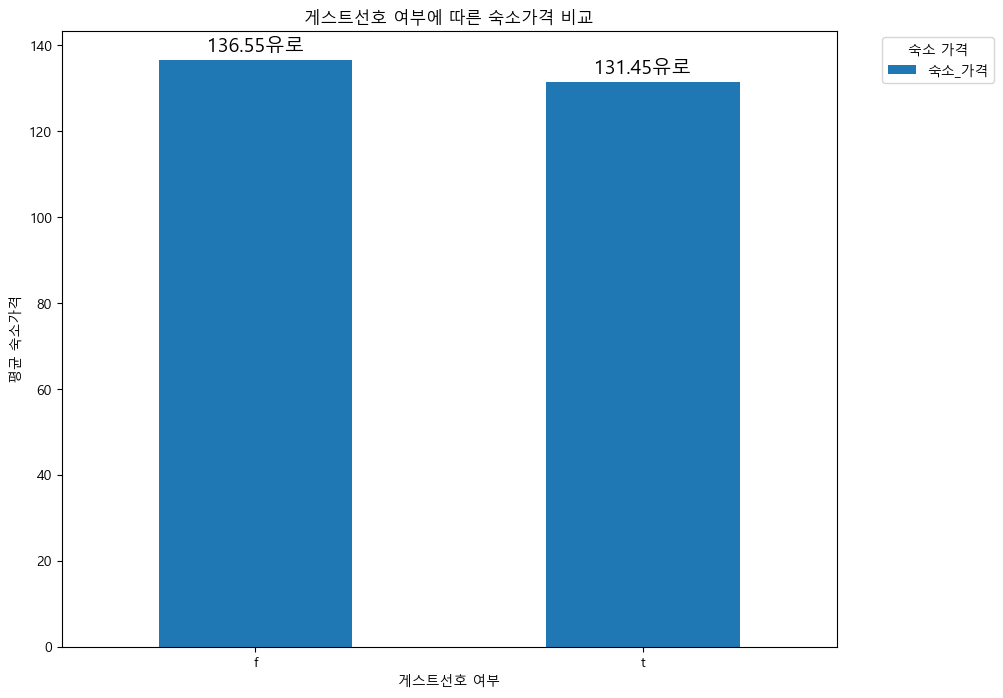

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = london_lists.groupby('게스트선호')[
    '숙소_가격'].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='bar', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 숙소가격 비교')
plt.xlabel('게스트선호 여부')
plt.ylabel('평균 숙소가격')
plt.xticks(rotation=0)
plt.legend(title='숙소 가격', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}유로', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)
    
plt.show()

게스트선호
f    4.656365
t    4.960122
Name: 리뷰점수, dtype: float64


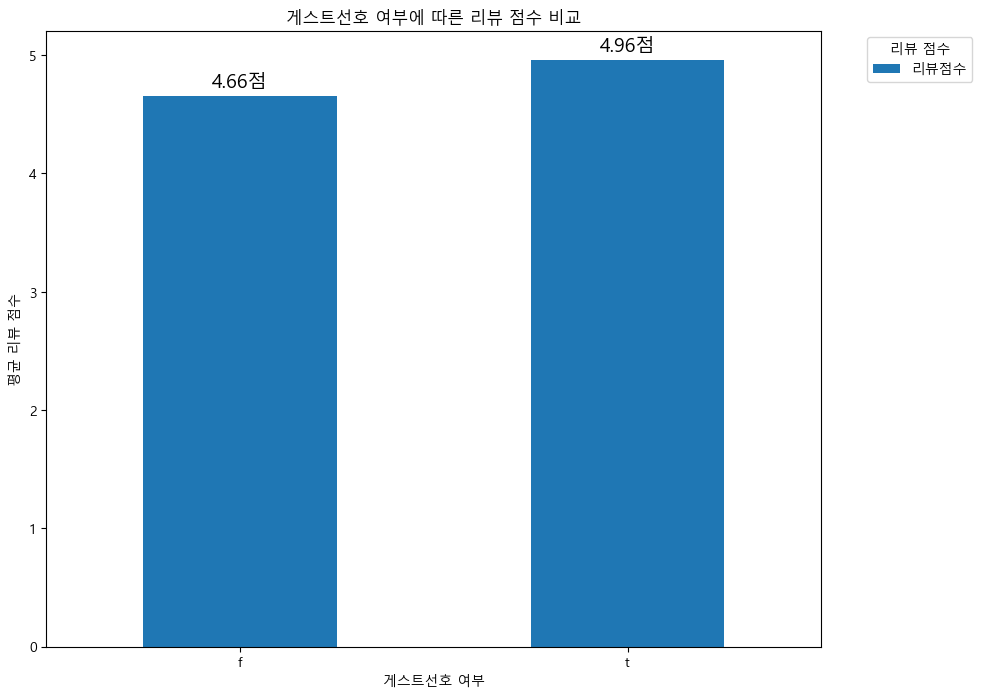

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = london_lists.groupby('게스트선호')[
    '리뷰점수'].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='bar', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 리뷰 점수 비교')
plt.xlabel('게스트선호 여부')
plt.ylabel('평균 리뷰 점수')
plt.xticks(rotation=0)
plt.legend(title='리뷰 점수', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}점', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)
    
plt.show()

게스트선호에 따른 리뷰수 

게스트선호
f    29.092507
t    47.800497
Name: 리뷰수, dtype: float64


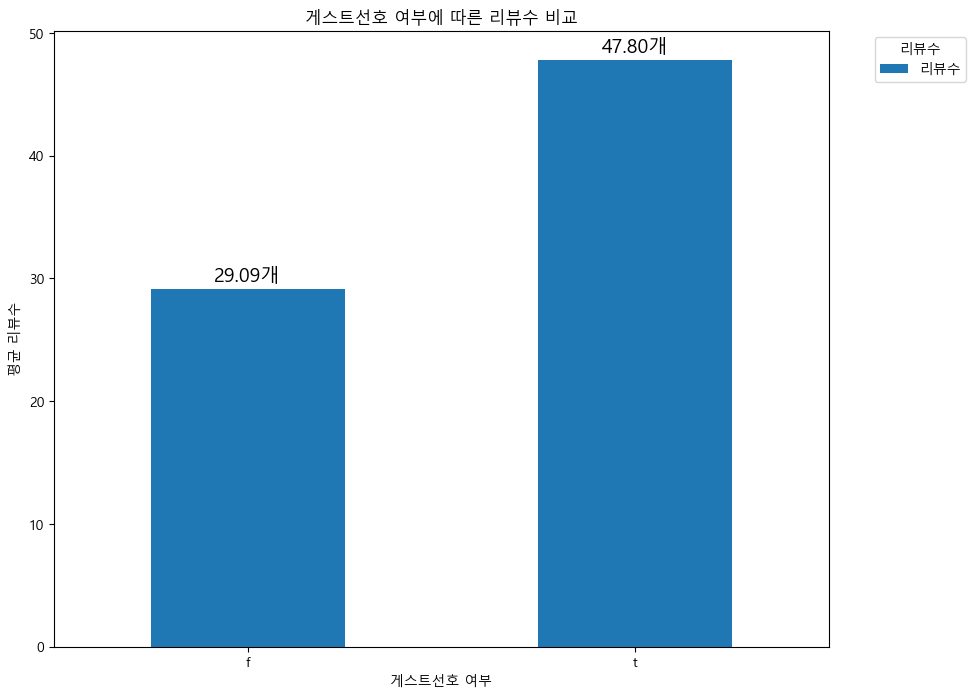

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = london_lists.groupby('게스트선호')[
    '리뷰수'].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='bar', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 리뷰수 비교')
plt.xlabel('게스트선호 여부')
plt.ylabel('평균 리뷰수')
plt.xticks(rotation=0)
plt.legend(title='리뷰수', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}개', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)
    
plt.show()

In [168]:
import matplotlib.font_manager as fm 

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'cmr10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'cmex10',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmmi10',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmb10',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans',
 'Ebrima',
 'Myanmar Text',
 'Goudy Old Style',
 'Ebrima',
 'Yu Gothic',
 'Segoe UI',
 'Palatino Linotype',
 'Lucida Bright',
 'Trebuchet MS',
 'Bookman Old Style',
 'Book Antiqua',
 'Courier New',
 'Elephant',
 'Perpetua',
 'Century Gothic',
 'Rockwell Condensed',
 'Franklin Gothic Medium',
 'Lucida Sans Typewriter',
 'Pristina',
 'Arial',

In [170]:
font_list.index('NanumSquare')

ValueError: 'NanumSquare' is not in list

In [171]:
import koreanize_matplotlib

       숙소_정확성_리뷰점수  숙소_청결도_리뷰점수  숙소_체크인_리뷰점수  숙소_소통_리뷰점수  숙소_위치_리뷰점수  \
게스트선호                                                                  
f         4.696988     4.632015     4.762741    4.794647    4.716287   
t         4.944841     4.918280     4.948278    4.972255    4.858357   

       숙소_가격_리뷰점수  
게스트선호              
f        4.570471  
t        4.863191  


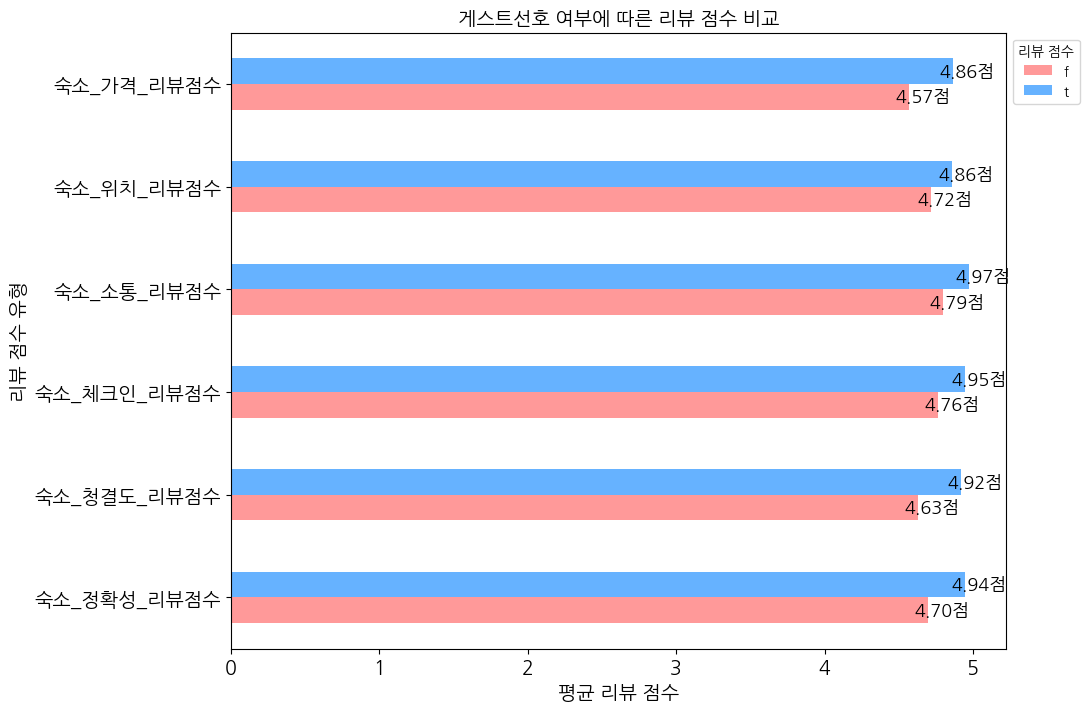

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '../../../../data/NanumSquareB.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

fontprop = fm.FontProperties(fname=path)
# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = london_lists.groupby('게스트선호')[[
    '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', 
    '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].mean()

print(review_scores)

# 색상 지정
color_map = {
    '숙소_정확성_리뷰점수': '#FF9999',
    '숙소_청결도_리뷰점수': '#66B2FF',
    '숙소_체크인_리뷰점수': '#99FF99',
    '숙소_소통_리뷰점수': '#FFCC99',
    '숙소_위치_리뷰점수': '#C2C2F0',
    '숙소_가격_리뷰점수': '#FFB266'
}

# 시각화를 위해 색상을 적용
colors = [color_map[col] for col in review_scores.columns]

# 시각화
ax = review_scores.T.plot(kind='barh', figsize=(10, 8), color=colors)
plt.title('게스트선호 여부에 따른 리뷰 점수 비교', fontsize=14)
plt.xlabel('평균 리뷰 점수', fontsize=14)
plt.ylabel('리뷰 점수 유형', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.legend(title='리뷰 점수', bbox_to_anchor=(1., 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}점', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=13)

plt.show()



게스트선호인 숙소는 리뷰수가 0-600개가 많고 리뷰점수는 4.9점이상 <br>
게스트선호가 아닌 숙소는 전체적으로 다양하게 분포 <br>


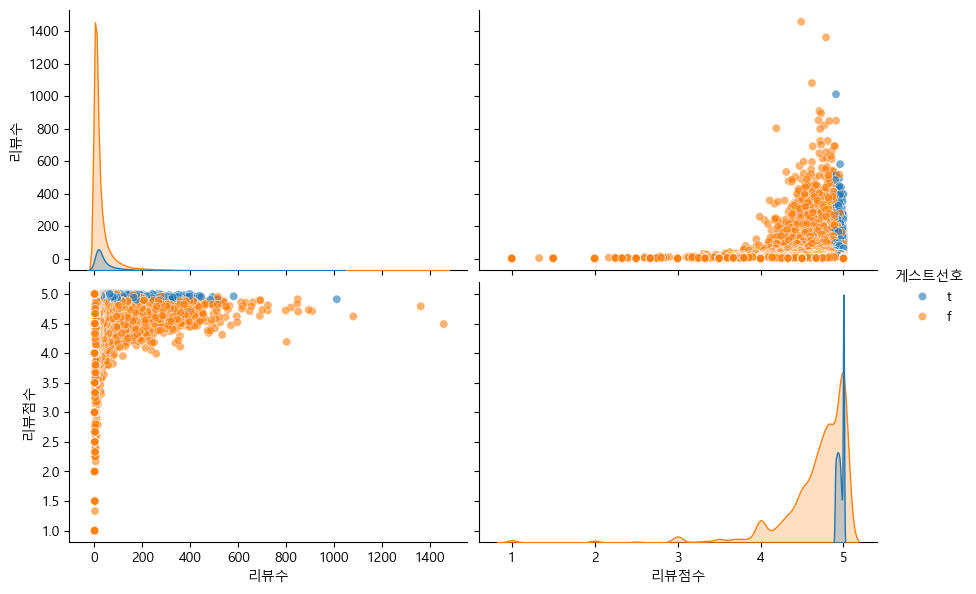

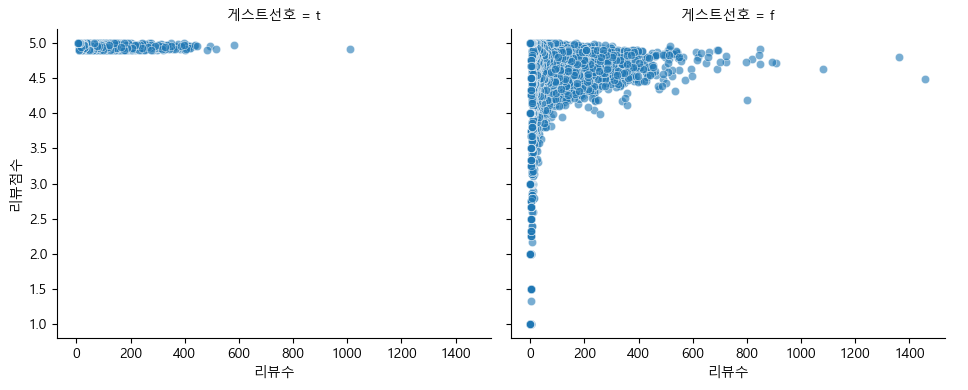

In [20]:

sns.pairplot(london_lists, vars=['리뷰수', '리뷰점수'], hue='게스트선호', height=3, aspect=1.5, plot_kws={'alpha':0.6})
plt.show()


g = sns.FacetGrid(london_lists, col='게스트선호', height=4, aspect=1.2)
g.map(sns.scatterplot, '리뷰수', '리뷰점수', alpha=0.6)
g.add_legend()
plt.show()

게스트선호가 t인 숙소는 가격이 싼 숙소가 많고 비싸질수록 적어지는 것을 볼수 있다 <br>
그에 비해 게스트선호가 f인 숙소는 특정 가격 골고루 분포하고 있다

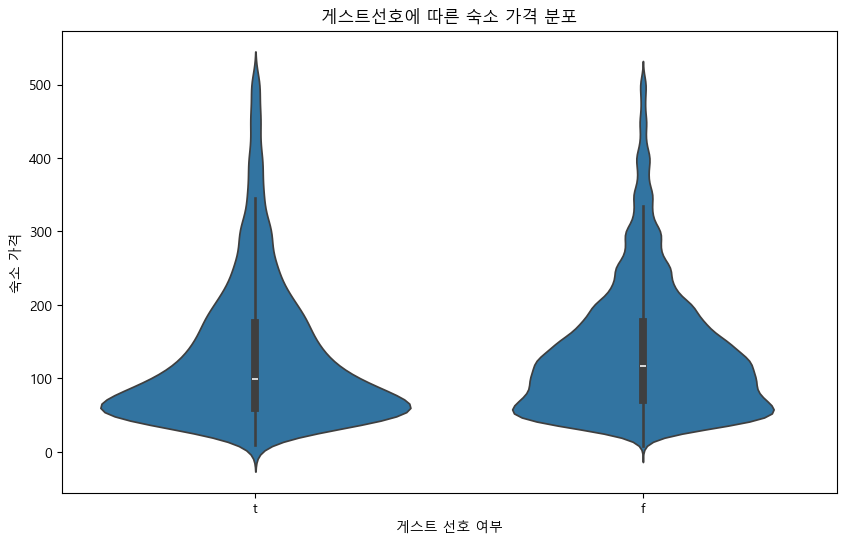

In [21]:

# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))
sns.violinplot(x='게스트선호', y='숙소_가격', data=london_lists)
plt.title('게스트선호에 따른 숙소 가격 분포')
plt.xlabel('게스트 선호 여부')
plt.ylabel('숙소 가격')
plt.show()

게스트선호인 숙소의 숙소 유형별 숙소수

숙소_유형
Entire home/apt    23851
Private room       12556
Name: count, dtype: int64


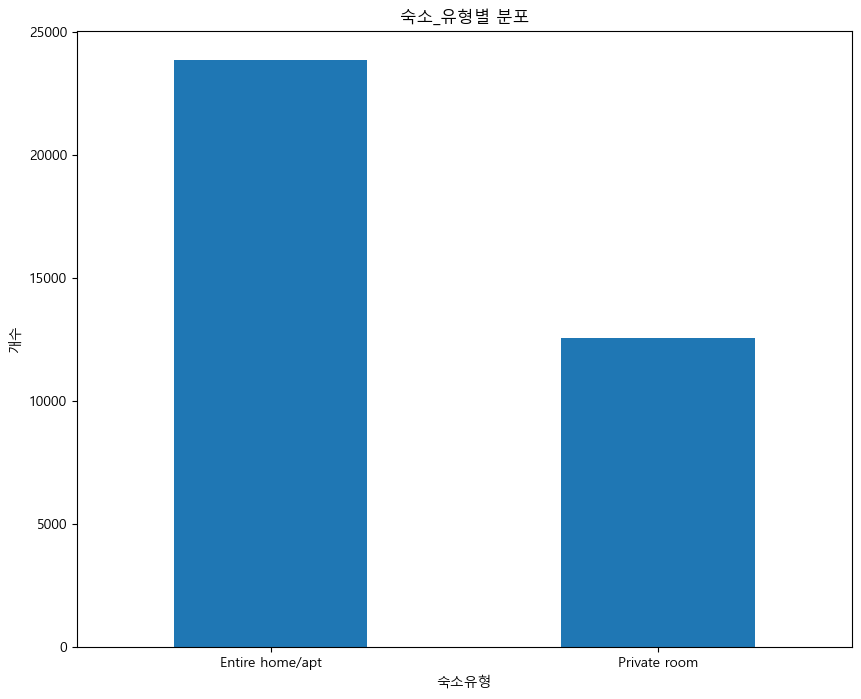

In [45]:
# '게스트선호'가 't'인 데이터 필터링
guest_preference_t = london_lists

# 숙소유형별 '게스트선호'가 't'인 행의 수 계산
distribution = guest_preference_t['숙소_유형'].value_counts()

# 결과 출력
print(distribution)

# 시각화
ax = distribution.plot(kind='bar', figsize=(10, 8))
plt.title('숙소_유형별 분포')
plt.xlabel('숙소유형')
plt.ylabel('개수')
plt.xticks(rotation=0)

# # 각 막대 위에 값 표시
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}개', (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

숙소_유형
Entire home/apt    21593
Private room       10383
Name: count, dtype: int64


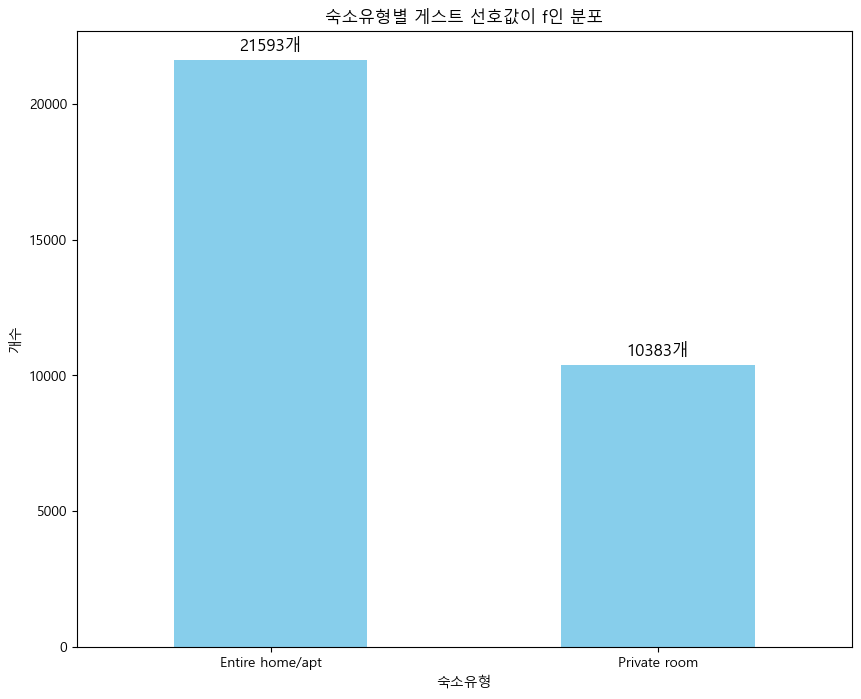

In [23]:
# '게스트선호'가 't'인 데이터 필터링
guest_preference_t = london_lists[london_lists['게스트선호'] == 'f']

# 숙소유형별 '게스트선호'가 't'인 행의 수 계산
distribution = guest_preference_t['숙소_유형'].value_counts()

# 결과 출력
print(distribution)

# 시각화
ax = distribution.plot(kind='bar', figsize=(10, 8), color='skyblue')
plt.title('숙소유형별 게스트 선호값이 f인 분포')
plt.xlabel('숙소유형')
plt.ylabel('개수')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}개', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

In [24]:
london_lists.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약_가능여부', '리뷰수',
       '12개월_리뷰수', '30일_리뷰수', '마지막_리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수',
       '게스트선호'],
      dtype='object')

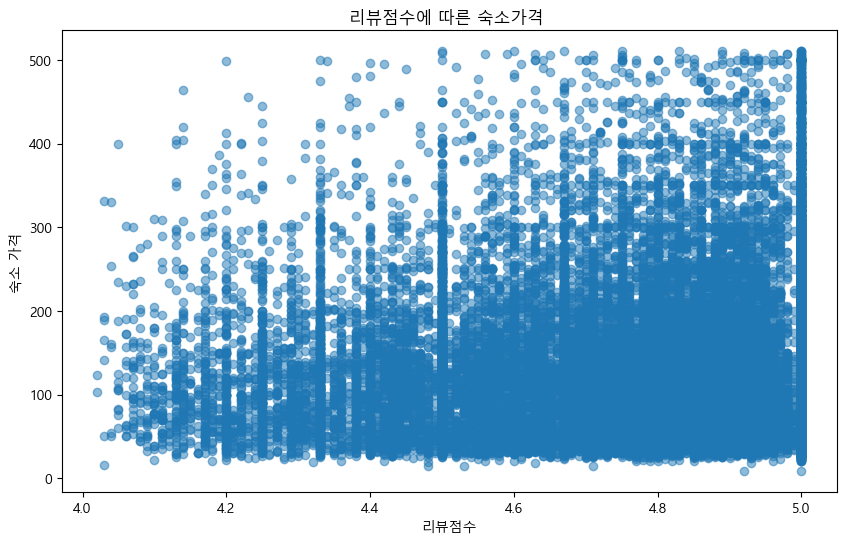

In [25]:
# 숙소 가격과 수용가능한 최대 인원수 사이의 관계 탐색
plt.figure(figsize=(10, 6))
plt.scatter(london_lists[london_lists['리뷰점수']> 4]['리뷰점수'], london_lists[london_lists['리뷰점수']> 4]['숙소_가격'], alpha=0.5)
plt.title('리뷰점수에 따른 숙소가격 ')
plt.xlabel('리뷰점수')
plt.ylabel('숙소 가격')
plt.show()

숙소가격에 따른 욕실수 침실수 침대수 를 알아보자 

In [26]:
london_lists['숙소_가격'].describe()

count    36407.000000
mean       135.929409
std         88.856643
min          8.000000
25%         69.000000
50%        115.000000
75%        176.000000
max        510.000000
Name: 숙소_가격, dtype: float64

In [27]:
london_lists[london_lists['숙소_가격'] <= 135.0].count() # 21982개
london_lists[(london_lists['숙소_가격'] > 135.0) & (london_lists['숙소_가격'] <= 510.0)].count() # 14425개

숙소_id          14425
숙소_url         14425
호스트_id         14425
슈퍼호스트          14425
숙소_지역          14425
숙소_특징          14425
숙소_유형          14425
수용_인원수         14425
욕실수            14425
침실수            14425
침대수            14425
편의시설           14425
숙소_가격          14425
예약_가능여부        14425
리뷰수            14425
12개월_리뷰수       14425
30일_리뷰수        14425
마지막_리뷰         14425
리뷰점수           14425
숙소_정확성_리뷰점수    14425
숙소_청결도_리뷰점수    14425
숙소_체크인_리뷰점수    14425
숙소_소통_리뷰점수     14425
숙소_위치_리뷰점수     14425
숙소_가격_리뷰점수     14425
평균_리뷰수         14425
게스트선호          14425
dtype: int64

In [28]:
price_135 = london_lists[london_lists['숙소_가격'] <= 135.0] 
price_510 = london_lists[(london_lists['숙소_가격'] > 135.0) & (london_lists['숙소_가격'] <= 510.0)]

            욕실수       침실수       침대수
게스트선호                              
f      1.175859  1.084165  1.329291
t      1.170347  1.059236  1.175955


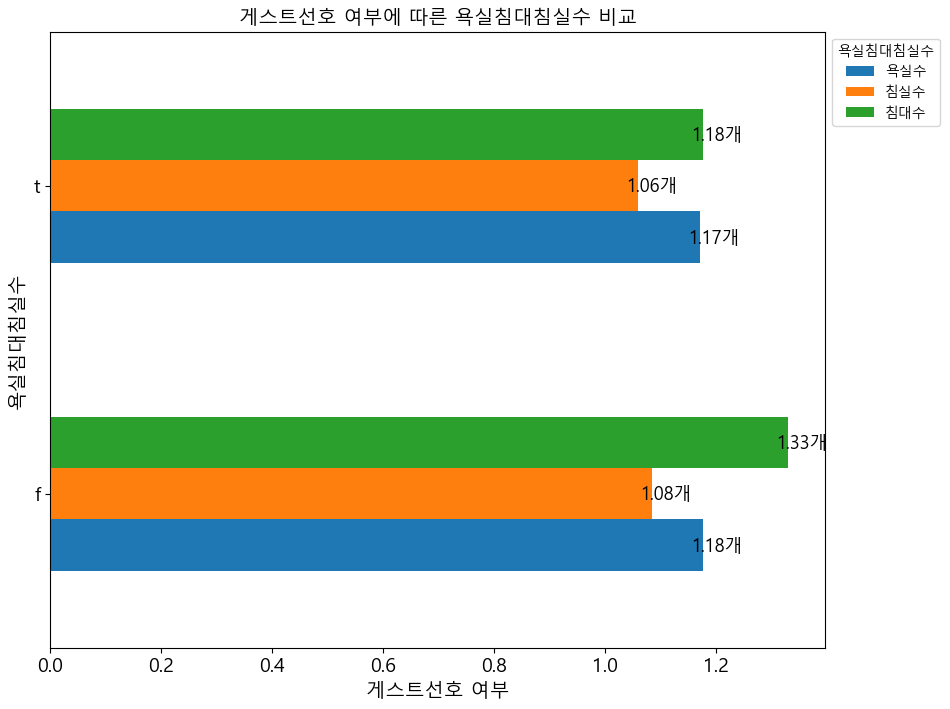

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = price_135.groupby('게스트선호')[['욕실수','침실수','침대수']].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='barh', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 욕실침대침실수 비교',fontsize=14)
plt.xlabel('게스트선호 여부',fontsize=14)
plt.ylabel('욕실침대침실수', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.legend(title='욕실침대침실수', bbox_to_anchor=(1., 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}개', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=13)
    
plt.show()

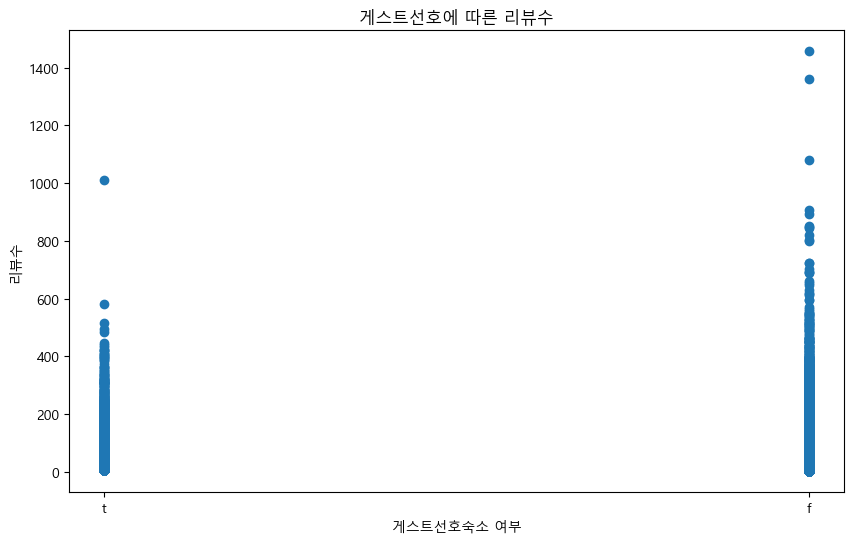

In [30]:
#게스트선호에 따른 리뷰수 
plt.figure(figsize=(10, 6))
plt.scatter(london_lists['게스트선호'], london_lists['리뷰수'], alpha=1)
plt.title('게스트선호에 따른 리뷰수')
plt.xlabel('게스트선호숙소 여부')
plt.ylabel('리뷰수')
plt.show()

게스트선호인 숙소가 몇개 없어서 적게 나타나는거 같다

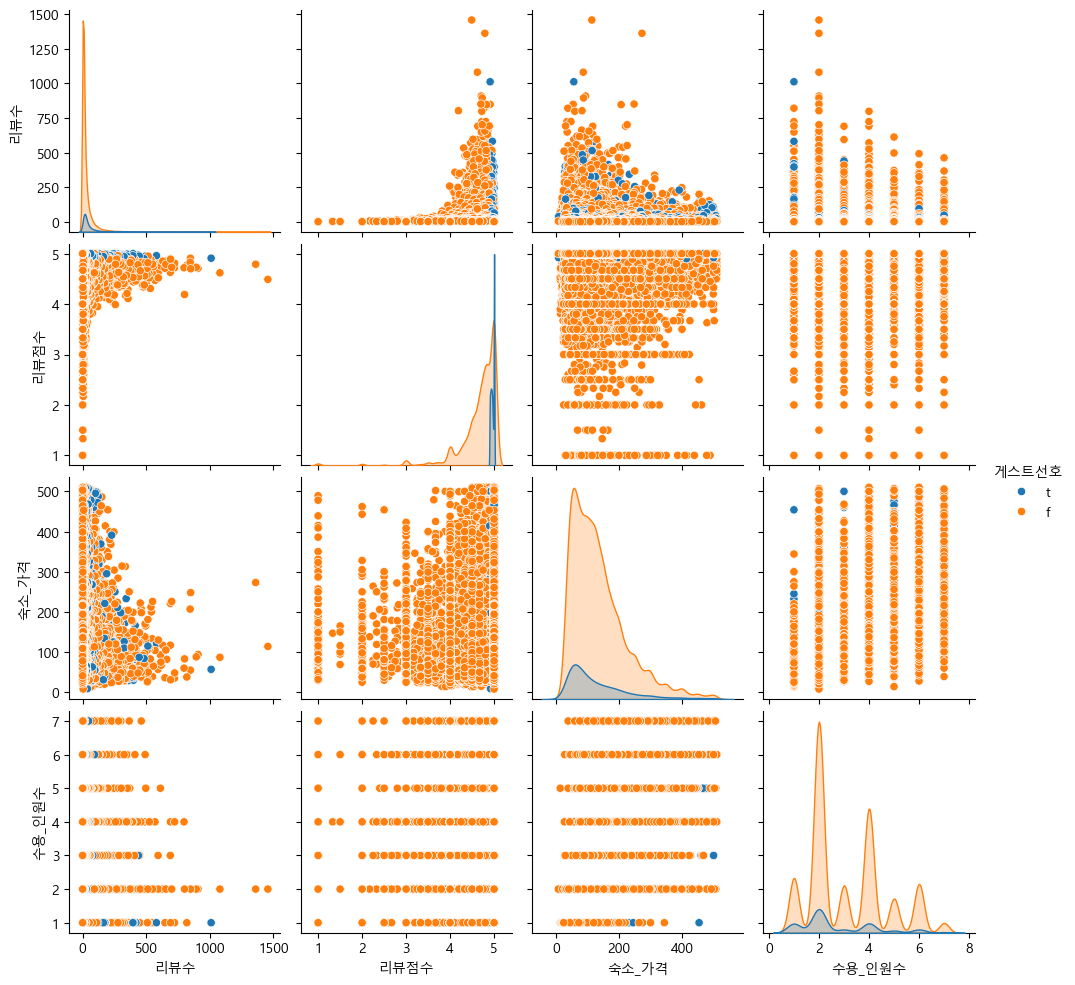

In [31]:
sns.pairplot(london_lists, vars=['리뷰수', '리뷰점수', '숙소_가격', '수용_인원수'], height=2.5, hue='게스트선호')
plt.show()

In [32]:
# london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩 

In [33]:
london_lists_corr = london_lists[['리뷰점수','리뷰수','숙소_가격','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수','수용_인원수']]

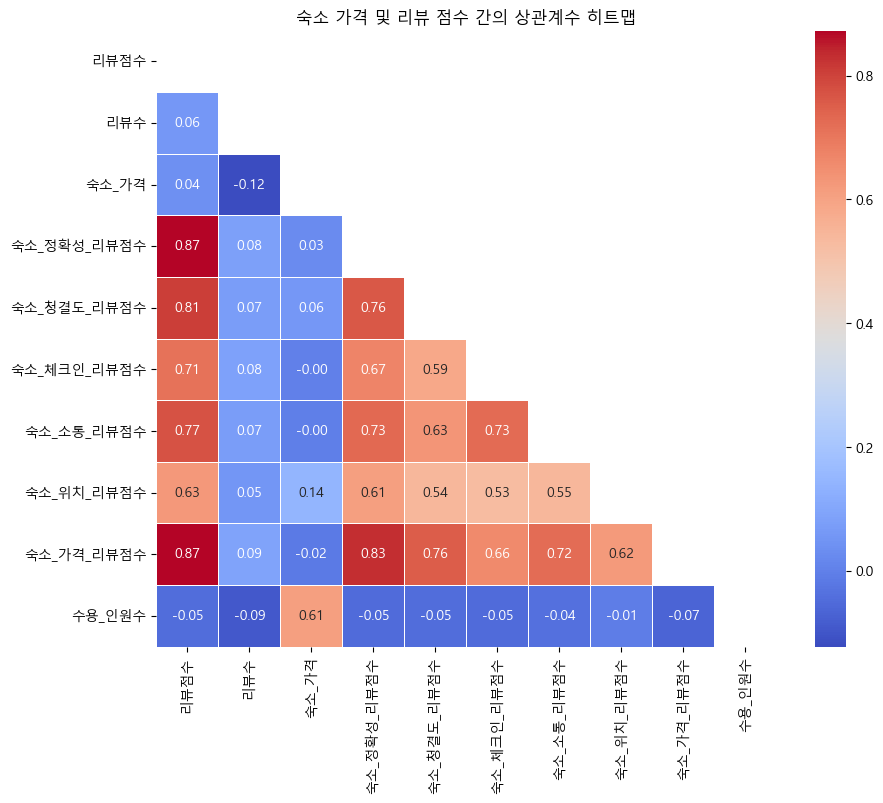

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = london_lists_corr.corr()


# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

게스트 선호가 t인 각 리뷰점수들 간의 상관관계

In [35]:
guest_1_scores = london_lists[london_lists['게스트선호'] == 't'][['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

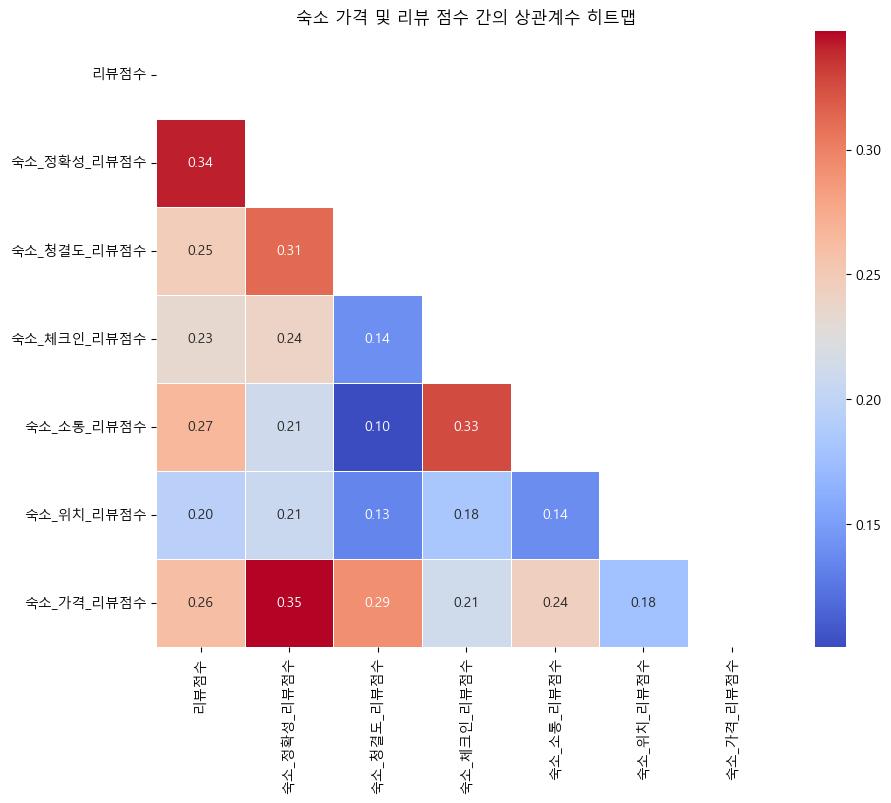

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = guest_1_scores.corr()


# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

게스트 선호가 0인 각 리뷰점수들 간의 상관관계

In [37]:
guest_0_scores = london_lists[london_lists['게스트선호'] == 'f'][['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

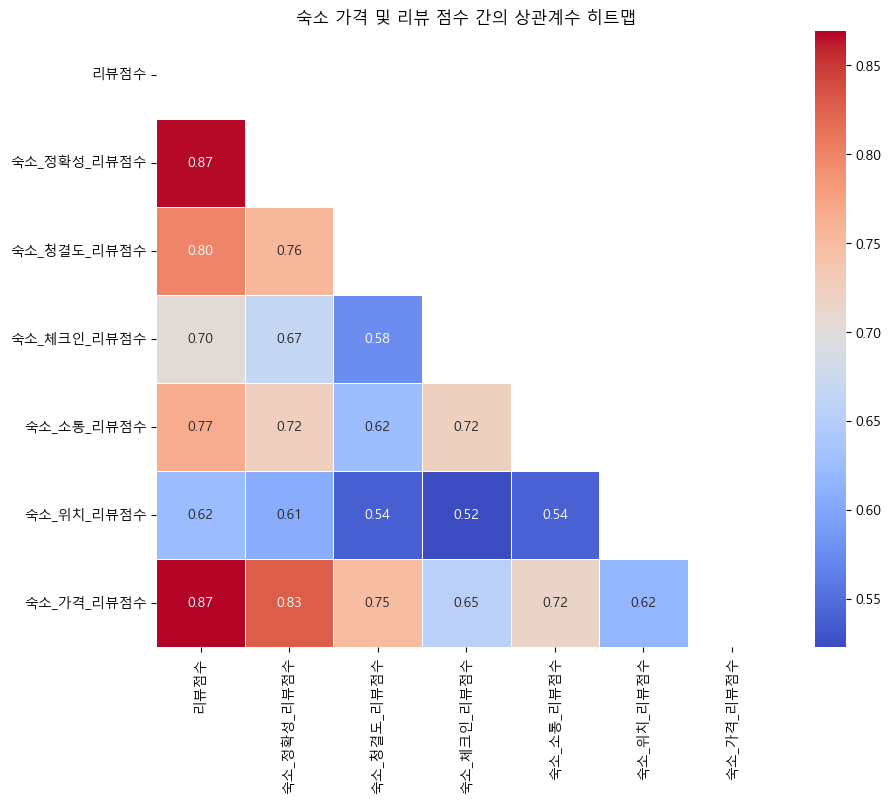

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = guest_0_scores.corr()


# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

회귀분석 

In [113]:
london_lists['게스트선호']

0        t
1        f
2        f
3        f
4        f
        ..
90451    f
90568    f
90590    f
90648    f
90735    f
Name: 게스트선호, Length: 36407, dtype: object

In [114]:
london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩 

C:\Users\Master\AppData\Local\Temp\ipykernel_15668\707671977.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [115]:
import numpy as np
import statsmodels.api as sm

# 종속변수와 독립변수 설정
X = london_lists[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']] # 데이터 유형을 명시적으로 float로 변환
y = london_lists['게스트선호']  # 수치형 데이터 변형

# 입력 데이터를 NumPy 배열로 변환
X = sm.add_constant(np.asarray(X))

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  게스트선호   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     286.1
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:00:59   Log-Likelihood:                -10119.
No. Observations:               36407   AIC:                         2.025e+04
Df Residuals:                   36400   BIC:                         2.031e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5878      0.025    -23.437      0.0

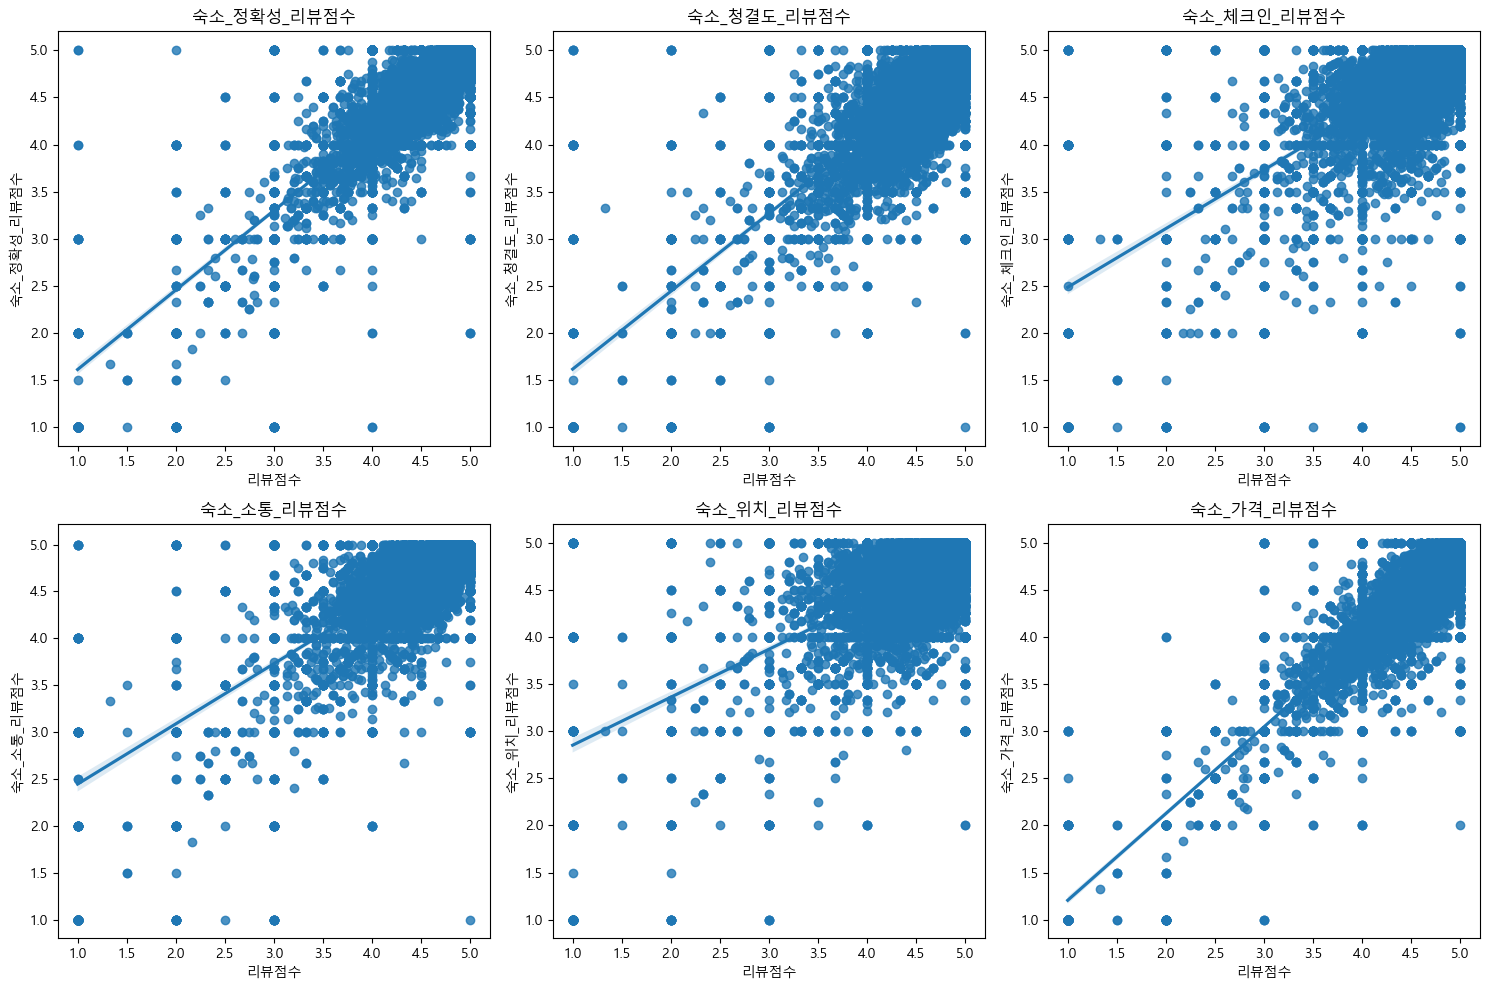

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

review_columns = [
    '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
    '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'
]


plt.figure(figsize=(15, 10))

for i, col in enumerate(review_columns, 1):
    plt.subplot(2, 3, i)  # 2행 3열의 플롯 배열
    sns.regplot(x='리뷰점수', y=col, data=london_lists)
    plt.title(col)
    plt.xlabel('리뷰점수')
    plt.ylabel(col)

plt.tight_layout()
plt.show()